In [76]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [77]:
# Set paths
train_dir = 'split-data/train'
val_dir = 'split-data/val' 

In [78]:
# Image parameters
img_size = 256
batch_size = 8
num_classes = 1


In [79]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.1,
    fill_mode='nearest'
)

In [80]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [81]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

Found 320 images belonging to 2 classes.


In [82]:
val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 80 images belonging to 2 classes.


In [83]:
# Build the model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))
base_model.trainable = False

In [84]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='gelu')(x)
x = Dropout(0.4)(x)
preds = Dense(1, activation='sigmoid')(x)

In [85]:
model = Model(inputs=base_model.input, outputs=preds)

In [86]:
model.summary

<bound method Model.summary of <Functional name=functional_3, built=True>>

In [87]:
from tensorflow.keras.metrics import AUC, Precision, Recall

# Compile with additional metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='auc_roc')
    ]
)

In [88]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

In [89]:
# Train (Warm-up)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=callbacks
)

d:\Dissertation-Project\Projects\code\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.6483 - auc_roc: 0.7269 - loss: 0.6213 - precision: 0.6748 - recall: 0.6311
Epoch 1: val_loss improved from inf to 1.39313, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 665ms/step - accuracy: 0.6493 - auc_roc: 0.7276 - loss: 0.6203 - precision: 0.6747 - recall: 0.6339 - val_accuracy: 0.5000 - val_auc_roc: 0.8700 - val_loss: 1.3931 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.7311 - auc_roc: 0.7764 - loss: 0.5487 - precision: 0.6567 - recall: 0.9276
Epoch 2: val_loss improved from 1.39313 to 1.26436, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 599ms/step - accuracy: 0.7313 - auc_roc: 0.7764 - loss: 0.5486 - precision: 0.6574 - recall: 0.9265 - val_accuracy: 0.5000 - val_auc_roc: 0.8669 - val_loss: 1.2644 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.7219 - auc_roc: 0.8171 - loss: 0.5278 - precision: 0.6476 - recall: 0.8989
Epoch 3: val_loss improved from 1.26436 to 1.11442, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 584ms/step - accuracy: 0.7217 - auc_roc: 0.8164 - loss: 0.5282 - precision: 0.6481 - recall: 0.8975 - val_accuracy: 0.5000 - val_auc_roc: 0.8828 - val_loss: 1.1144 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.7171 - auc_roc: 0.7622 - loss: 0.5589 - precision: 0.6338 - recall: 0.8780
Epoch 4: val_loss improved from 1.11442 to 0.94678, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 578ms/step - accuracy: 0.7177 - auc_roc: 0.7625 - loss: 0.5583 - precision: 0.6351 - recall: 0.8781 - val_accuracy: 0.5000 - val_auc_roc: 0.8947 - val_loss: 0.9468 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.7112 - auc_roc: 0.8350 - loss: 0.5171 - precision: 0.6305 - recall: 0.8675
Epoch 5: val_loss improved from 0.94678 to 0.83242, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 563ms/step - accuracy: 0.7115 - auc_roc: 0.8343 - loss: 0.5171 - precision: 0.6316 - recall: 0.8671 - val_accuracy: 0.5000 - val_auc_roc: 0.8956 - val_loss: 0.8324 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.7295 - auc_roc: 0.7601 - loss: 0.5389 - precision: 0.6592 - recall: 0.8594
Epoch 6: val_loss improved from 0.83242 to 0.73332, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 561ms/step - accuracy: 0.7298 - auc_roc: 0.7605 - loss: 0.5385 - precision: 0.6603 - recall: 0.8590 - val_accuracy: 0.5000 - val_auc_roc: 0.9078 - val_loss: 0.7333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.7494 - auc_roc: 0.8536 - loss: 0.5003 - precision: 0.7251 - recall: 0.8423
Epoch 7: val_loss improved from 0.73332 to 0.64437, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 583ms/step - accuracy: 0.7490 - auc_roc: 0.8529 - loss: 0.5009 - precision: 0.7244 - recall: 0.8421 - val_accuracy: 0.5000 - val_auc_roc: 0.9084 - val_loss: 0.6444 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.8068 - auc_roc: 0.8308 - loss: 0.4648 - precision: 0.7487 - recall: 0.9501
Epoch 8: val_loss improved from 0.64437 to 0.58754, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 583ms/step - accuracy: 0.8063 - auc_roc: 0.8306 - loss: 0.4655 - precision: 0.7481 - recall: 0.9497 - val_accuracy: 0.5125 - val_auc_roc: 0.9147 - val_loss: 0.5875 - val_precision: 1.0000 - val_recall: 0.0250 - learning_rate: 1.0000e-04
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.7305 - auc_roc: 0.8496 - loss: 0.4698 - precision: 0.6525 - recall: 0.9244
Epoch 9: val_loss improved from 0.58754 to 0.54581, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 569ms/step - accuracy: 0.7313 - auc_roc: 0.8495 - loss: 0.4697 - precision: 0.6538 - recall: 0.9235 - val_accuracy: 0.6375 - val_auc_roc: 0.9159 - val_loss: 0.5458 - val_precision: 0.9231 - val_recall: 0.3000 - learning_rate: 1.0000e-04
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.7517 - auc_roc: 0.8182 - loss: 0.4951 - precision: 0.7022 - recall: 0.8813
Epoch 10: val_loss improved from 0.54581 to 0.49678, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 589ms/step - accuracy: 0.7520 - auc_roc: 0.8186 - loss: 0.4950 - precision: 0.7024 - recall: 0.8816 - val_accuracy: 0.7750 - val_auc_roc: 0.9203 - val_loss: 0.4968 - val_precision: 0.8667 - val_recall: 0.6500 - learning_rate: 1.0000e-04
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.7475 - auc_roc: 0.8144 - loss: 0.5151 - precision: 0.7069 - recall: 0.8329
Epoch 11: val_loss improved from 0.49678 to 0.45073, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 594ms/step - accuracy: 0.7472 - auc_roc: 0.8145 - loss: 0.5149 - precision: 0.7068 - recall: 0.8324 - val_accuracy: 0.8625 - val_auc_roc: 0.9272 - val_loss: 0.4507 - val_precision: 0.8372 - val_recall: 0.9000 - learning_rate: 1.0000e-04
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.7802 - auc_roc: 0.8705 - loss: 0.4415 - precision: 0.7089 - recall: 0.9238
Epoch 12: val_loss improved from 0.45073 to 0.41765, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 571ms/step - accuracy: 0.7802 - auc_roc: 0.8697 - loss: 0.4421 - precision: 0.7092 - recall: 0.9233 - val_accuracy: 0.8500 - val_auc_roc: 0.9284 - val_loss: 0.4177 - val_precision: 0.7917 - val_recall: 0.9500 - learning_rate: 1.0000e-04
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.7229 - auc_roc: 0.8191 - loss: 0.5189 - precision: 0.6815 - recall: 0.8274
Epoch 13: val_loss improved from 0.41765 to 0.41449, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 567ms/step - accuracy: 0.7236 - auc_roc: 0.8190 - loss: 0.5188 - precision: 0.6823 - recall: 0.8275 - val_accuracy: 0.8625 - val_auc_roc: 0.9275 - val_loss: 0.4145 - val_precision: 0.7959 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.7686 - auc_roc: 0.8419 - loss: 0.4793 - precision: 0.7069 - recall: 0.9143
Epoch 14: val_loss improved from 0.41449 to 0.38695, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 578ms/step - accuracy: 0.7686 - auc_roc: 0.8422 - loss: 0.4790 - precision: 0.7071 - recall: 0.9137 - val_accuracy: 0.8500 - val_auc_roc: 0.9306 - val_loss: 0.3869 - val_precision: 0.7800 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.7942 - auc_roc: 0.8606 - loss: 0.4650 - precision: 0.7497 - recall: 0.8800
Epoch 15: val_loss improved from 0.38695 to 0.37127, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 566ms/step - accuracy: 0.7939 - auc_roc: 0.8608 - loss: 0.4644 - precision: 0.7493 - recall: 0.8801 - val_accuracy: 0.8375 - val_auc_roc: 0.9347 - val_loss: 0.3713 - val_precision: 0.7647 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 16/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.7989 - auc_roc: 0.8379 - loss: 0.4617 - precision: 0.7513 - recall: 0.9211
Epoch 16: val_loss improved from 0.37127 to 0.35056, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 584ms/step - accuracy: 0.7987 - auc_roc: 0.8382 - loss: 0.4614 - precision: 0.7509 - recall: 0.9207 - val_accuracy: 0.8250 - val_auc_roc: 0.9334 - val_loss: 0.3506 - val_precision: 0.7500 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 17/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.8001 - auc_roc: 0.8499 - loss: 0.4656 - precision: 0.7840 - recall: 0.8702
Epoch 17: val_loss improved from 0.35056 to 0.34733, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 574ms/step - accuracy: 0.7995 - auc_roc: 0.8498 - loss: 0.4658 - precision: 0.7825 - recall: 0.8706 - val_accuracy: 0.8375 - val_auc_roc: 0.9484 - val_loss: 0.3473 - val_precision: 0.7547 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 18/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.7619 - auc_roc: 0.8682 - loss: 0.4529 - precision: 0.6951 - recall: 0.9026
Epoch 18: val_loss improved from 0.34733 to 0.34004, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 586ms/step - accuracy: 0.7622 - auc_roc: 0.8681 - loss: 0.4526 - precision: 0.6956 - recall: 0.9024 - val_accuracy: 0.8375 - val_auc_roc: 0.9409 - val_loss: 0.3400 - val_precision: 0.7647 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 19/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.7825 - auc_roc: 0.8441 - loss: 0.4757 - precision: 0.7191 - recall: 0.9137
Epoch 19: val_loss improved from 0.34004 to 0.33962, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 591ms/step - accuracy: 0.7826 - auc_roc: 0.8442 - loss: 0.4757 - precision: 0.7196 - recall: 0.9132 - val_accuracy: 0.8375 - val_auc_roc: 0.9472 - val_loss: 0.3396 - val_precision: 0.7647 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 20/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.7502 - auc_roc: 0.8646 - loss: 0.4622 - precision: 0.6916 - recall: 0.8680
Epoch 20: val_loss improved from 0.33962 to 0.33320, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 588ms/step - accuracy: 0.7508 - auc_roc: 0.8645 - loss: 0.4620 - precision: 0.6926 - recall: 0.8677 - val_accuracy: 0.8375 - val_auc_roc: 0.9450 - val_loss: 0.3332 - val_precision: 0.7647 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 21/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.7963 - auc_roc: 0.8752 - loss: 0.4619 - precision: 0.7676 - recall: 0.8816
Epoch 21: val_loss improved from 0.33320 to 0.33184, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 580ms/step - accuracy: 0.7960 - auc_roc: 0.8750 - loss: 0.4619 - precision: 0.7670 - recall: 0.8816 - val_accuracy: 0.8375 - val_auc_roc: 0.9409 - val_loss: 0.3318 - val_precision: 0.7647 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 22/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.7247 - auc_roc: 0.8584 - loss: 0.4751 - precision: 0.6433 - recall: 0.9107
Epoch 22: val_loss improved from 0.33184 to 0.32677, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 572ms/step - accuracy: 0.7260 - auc_roc: 0.8586 - loss: 0.4745 - precision: 0.6452 - recall: 0.9104 - val_accuracy: 0.8500 - val_auc_roc: 0.9400 - val_loss: 0.3268 - val_precision: 0.7800 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 23/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.8118 - auc_roc: 0.9040 - loss: 0.4062 - precision: 0.7858 - recall: 0.8609
Epoch 23: val_loss improved from 0.32677 to 0.32171, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 569ms/step - accuracy: 0.8112 - auc_roc: 0.9034 - loss: 0.4069 - precision: 0.7850 - recall: 0.8606 - val_accuracy: 0.8625 - val_auc_roc: 0.9400 - val_loss: 0.3217 - val_precision: 0.7959 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 24/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.7836 - auc_roc: 0.8320 - loss: 0.4834 - precision: 0.7207 - recall: 0.9075
Epoch 24: val_loss did not improve from 0.32171
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 548ms/step - accuracy: 0.7833 - auc_roc: 0.8325 - loss: 0.4833 - precision: 0.7207 - recall: 0.9071 - val_accuracy: 0.8625 - val_auc_roc: 0.9441 - val_loss: 0.3233 - val_precision: 0.7959 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 25/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.8200 - auc_roc: 0.8707 - loss: 0.4314 - precision: 0.7448 - recall: 0.9635
Epoch 25: val_loss improved from 0.32171 to 0.31704, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 571ms/step - accuracy: 0.8197 - auc_roc: 0.8704 - loss: 0.4318 - precision: 0.7448 - recall: 0.9627 - val_accuracy: 0.8625 - val_auc_roc: 0.9459 - val_loss: 0.3170 - val_precision: 0.7959 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 26/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.7771 - auc_roc: 0.8835 - loss: 0.4373 - precision: 0.7204 - recall: 0.9091
Epoch 26: val_loss improved from 0.31704 to 0.30937, saving model to best_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 579ms/step - accuracy: 0.7773 - auc_roc: 0.8835 - loss: 0.4373 - precision: 0.7206 - recall: 0.9091 - val_accuracy: 0.8625 - val_auc_roc: 0.9519 - val_loss: 0.3094 - val_precision: 0.7959 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 27/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.7661 - auc_roc: 0.8537 - loss: 0.4782 - precision: 0.7417 - recall: 0.8242
Epoch 27: val_loss did not improve from 0.30937
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 557ms/step - accuracy: 0.7662 - auc_roc: 0.8537 - loss: 0.4781 - precision: 0.7418 - recall: 0.8242 - val_accuracy: 0.8625 - val_auc_roc: 0.9484 - val_loss: 0.3106 - val_precision: 0.7959 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 28/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.7879 - auc_roc: 0.8981 - loss: 0.4235 - precision: 0.7095 - recall: 0.9238
Epoch 28: val_loss did not improve from 0.30937
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 546ms/step - accuracy: 0.7876 - auc_roc: 0.8973 - los

In [90]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [91]:
# Fine-tune: Unfreeze last few layers of base model
base_model.trainable = True
for layer in base_model.layers[:-60]:  # Freeze all except last 60 layers
    layer.trainable = False

In [92]:
# Compile again after unfreezing layers for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='auc_roc')
    ]
)

In [93]:
# Fine-tune training
history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=35,
    callbacks=callbacks
)

Epoch 1/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 893ms/step - accuracy: 0.6425 - auc_roc: 0.7169 - loss: 0.8138 - precision: 0.6393 - recall: 0.6473
Epoch 1: val_loss did not improve from 0.30937
40/40 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6433 - auc_roc: 0.7169 - loss: 0.8149 - precision: 0.6400 - recall: 0.6483 - val_accuracy: 0.5000 - val_auc_roc: 0.5000 - val_loss: 7.0078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 2/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 877ms/step - accuracy: 0.6975 - auc_roc: 0.7327 - loss: 0.8252 - precision: 0.6871 - recall: 0.7245
Epoch 2: val_loss did not improve from 0.30937
40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 993ms/step - accuracy: 0.6969 - auc_roc: 0.7320 - loss: 0.8259 - precision: 0.6866 - recall: 0.7238 - val_accuracy: 0.5000 - val_auc_roc: 0.5000 - val_loss: 8.9677 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 3/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 882ms/step - accuracy: 0.6902 - au

40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7547 - auc_roc: 0.8030 - loss: 0.6374 - precision: 0.7757 - recall: 0.7651 - val_accuracy: 0.8750 - val_auc_roc: 0.9441 - val_loss: 0.2963 - val_precision: 0.8571 - val_recall: 0.9000 - learning_rate: 1.0000e-06
Epoch 16/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 895ms/step - accuracy: 0.8475 - auc_roc: 0.9271 - loss: 0.3491 - precision: 0.8130 - recall: 0.8848
Epoch 16: val_loss did not improve from 0.29628
40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8472 - auc_roc: 0.9266 - loss: 0.3508 - precision: 0.8134 - recall: 0.8839 - val_accuracy: 0.8500 - val_auc_roc: 0.9466 - val_loss: 0.3675 - val_precision: 0.7917 - val_recall: 0.9500 - learning_rate: 1.0000e-06
Epoch 17/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 920ms/step - accuracy: 0.8144 - auc_roc: 0.8773 - loss: 0.4657 - precision: 0.7996 - recall: 0.8341
Epoch 17: val_loss did not improve from 0.29628
40/40 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8140 - auc_roc: 0.8771 - loss: 0.4663

40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7984 - auc_roc: 0.8706 - loss: 0.4958 - precision: 0.7961 - recall: 0.8179 - val_accuracy: 0.8750 - val_auc_roc: 0.9588 - val_loss: 0.2656 - val_precision: 0.8571 - val_recall: 0.9000 - learning_rate: 1.0000e-06
Epoch 19/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 871ms/step - accuracy: 0.7455 - auc_roc: 0.8275 - loss: 0.5922 - precision: 0.7225 - recall: 0.7997
Epoch 19: val_loss did not improve from 0.26557
40/40 ━━━━━━━━━━━━━━━━━━━━ 39s 986ms/step - accuracy: 0.7457 - auc_roc: 0.8276 - loss: 0.5911 - precision: 0.7226 - recall: 0.7999 - val_accuracy: 0.8625 - val_auc_roc: 0.9431 - val_loss: 0.3271 - val_precision: 0.8718 - val_recall: 0.8500 - learning_rate: 1.0000e-06
Epoch 20/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 889ms/step - accuracy: 0.7973 - auc_roc: 0.8976 - loss: 0.4239 - precision: 0.7874 - recall: 0.8169
Epoch 20: val_loss did not improve from 0.26557
40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7971 - auc_roc: 0.8970 - loss: 0.4

In [94]:
# Evaluate on validation set
results = model.evaluate(val_gen)
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 475ms/step - accuracy: 0.8289 - auc_roc: 0.5238 - loss: 0.3373 - precision: 0.4156 - recall: 0.4875       
loss: 0.2656
compile_metrics: 0.8750


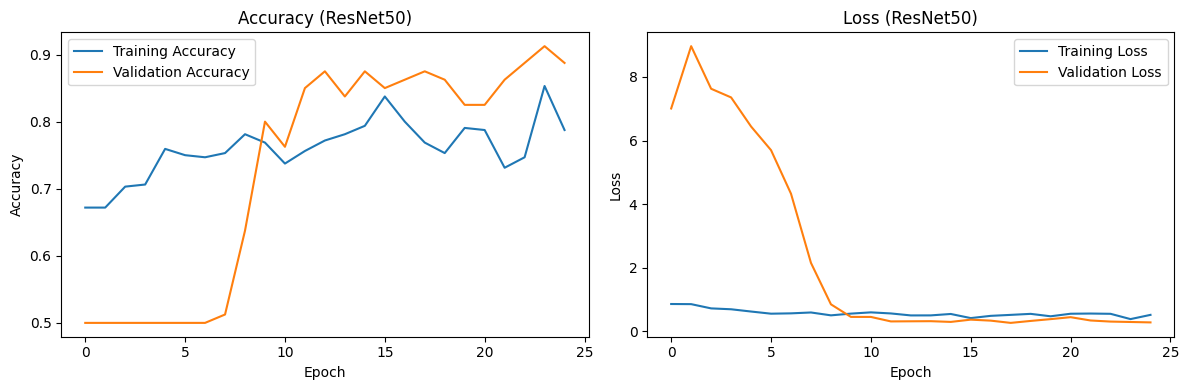

In [95]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_finetune.history['accuracy'], label='Training Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy (ResNet50)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_finetune.history['loss'], label='Training Loss')
plt.plot(history_finetune.history['val_loss'], label='Validation Loss')
plt.title('Loss (ResNet50)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 471ms/step
              precision    recall  f1-score   support

      female       0.89      0.85      0.87        40
        male       0.86      0.90      0.88        40

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.87        80
weighted avg       0.88      0.88      0.87        80



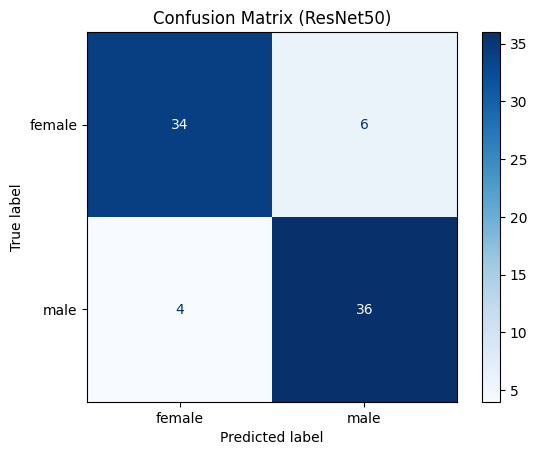

In [96]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict
y_pred_probs = model.predict(val_gen)
y_pred = (y_pred_probs > 0.5).astype(int)
y_true = val_gen.classes

# Report
print(classification_report(y_true, y_pred, target_names=['female', 'male']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['female', 'male'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (ResNet50)')
plt.show()

In [97]:
# AUC-ROC

from sklearn.metrics import roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay

auc_score = roc_auc_score(y_true, y_pred_probs)
print(f"AUC-ROC Score: {auc_score:.4f}")

AUC-ROC Score: 0.9594


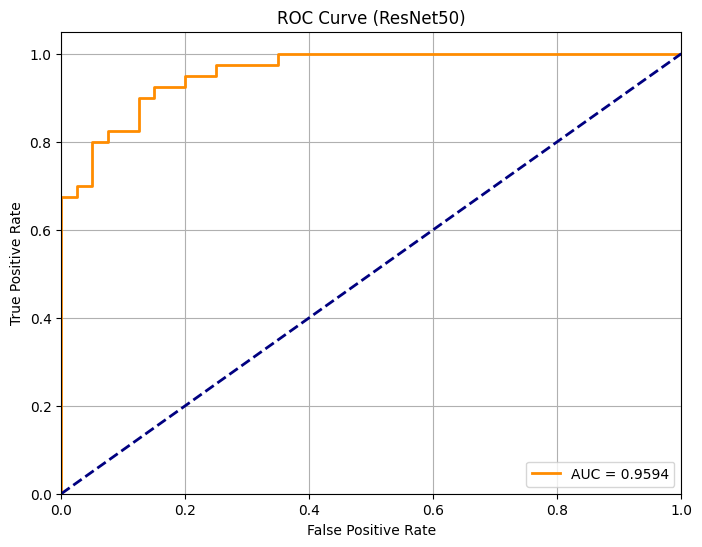

In [98]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (ResNet50)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

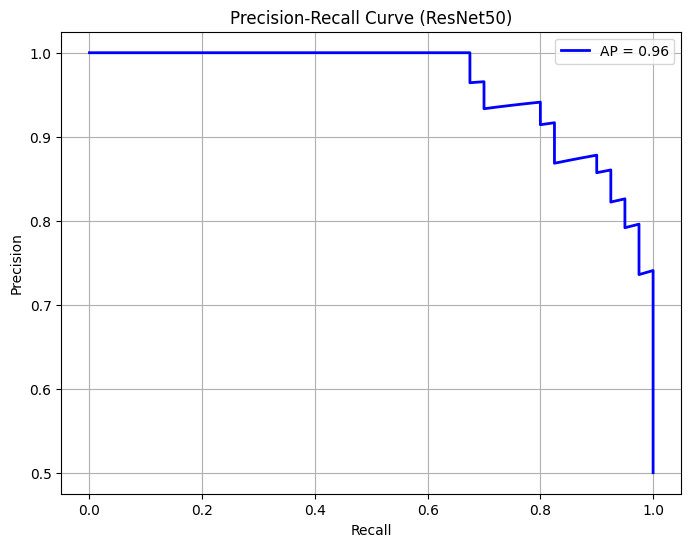

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall pairs and average precision
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_probs)
ap_score = average_precision_score(y_true, y_pred_probs)

# Plot Precision-Recall Curve with AP score
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', linewidth=2, label=f'AP = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (ResNet50)')
plt.grid(True)
plt.legend()
plt.show()
